In [1]:
xstart = .8
ystart = .8
zstart = .1
setup_time = 5

# These are the constants for juggling, it is set up so that the time of
# flight for the top ball is 3x the time of flight for the bottom ball and
# the time it takes for the hands to throw the ball is equal to the time
# of the bottom balls flight, and this is also equal to the recover time
# this makes for a seamless catch throw recover repeat cycle

# the time for a throw from the right to the left hand
tRL = 1.2
# the time for a throw from the left to the right hand
tLR = .4

# time it takes for a hand to throw a ball
tThrow = .4
# time it takes for a hand to recover back to catch position
tRecov = .4

# the delta change in the y and the z direction for the throw to take place
# for both hands
deltayr = .05
deltazr = .09
deltayl = .09
deltazl = .05


In [2]:
def spline5(t, T, p0, pf, v0, vf, a0, af):
    # Compute the parameters.
    a = p0
    b = v0
    c = a0
    d = + 10*(pf-p0)/T**3 - 6*v0/T**2 - 3*a0/T    - 4*vf/T**2 + 0.5*af/T
    e = - 15*(pf-p0)/T**4 + 8*v0/T**3 + 3*a0/T**2 + 7*vf/T**3 -     af/T**2
    f = +  6*(pf-p0)/T**5 - 3*v0/T**4 -   a0/T**3 - 3*vf/T**4 + 0.5*af/T**3
    # Compute the current (p,v).
    p = a + b * t +   c * t**2 +   d * t**3 +   e * t**4 +   f * t**5
    v =     b     + 2*c * t    + 3*d * t**2 + 4*e * t**3 + 5*f * t**4
    return (p,v)

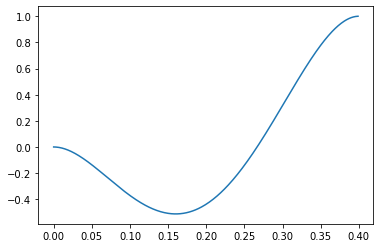

In [5]:
import numpy as np
import matplotlib.pyplot as plt

p0 = np.array([xstart, -ystart, zstart]).reshape(3, 1)
pf = np.array([xstart, -ystart + deltayr,
                zstart + deltazr]).reshape(3, 1)
v0 = np.array([0.0, 0.0, 0.0]).reshape(3, 1)
vf = np.array([1, ((2 * ystart) - deltayr) / tRL,
                (-deltazr + (.5 * 9.8 * tRL**2)) / tRL]).reshape(3, 1)
a = np.array([0.0, 0.0, 0.0]).reshape(3, 1)

t = np.arange(0, .4, .001)
T = .4

pdr, vdr = spline5(t, T, p0, pf, v0, vf, a, a)

plt.plot(t, vdr[0])
plt.show()

